<a href="https://colab.research.google.com/github/nihar-max/leanding_loan_club_defaulters_prediction/blob/master/%F0%9F%8F%A6_Lending_Club_Loan_%F0%9F%92%B0_Defaulters_%F0%9F%8F%83%E2%80%8D%E2%99%82_Prediction_Part_2_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import  seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Using Pandas library to load dataset
path = '/content/drive/MyDrive/lending club loans/data.csv'
loan_df = pd.read_csv(path)

In [ ]:
loan_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
loan_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,last_credit_pull_d,application_type,defaulters,pub_rec_bankruptcies_mean,pub_rec_bankruptcies_end_distribution,emp_length_,emp_title_,revol_util%,last_pymnt_m,last_pymnt_y
0,1296599.0,5000.0,5000.0,4975.0,162.87,24000.0,27.65,0.0,735.0,739.0,...,Sep-2016,INDIVIDUAL,0,0.0,0.0,10+ years,missing title,81-90%,Jan,2015
1,1314167.0,2500.0,2500.0,2500.0,59.83,30000.0,1.00,0.0,740.0,744.0,...,Sep-2016,INDIVIDUAL,1,0.0,0.0,<=1 year,ryder,0.1%-10%,Apr,2013
2,1313524.0,2400.0,2400.0,2400.0,84.33,12252.0,8.72,0.0,735.0,739.0,...,Sep-2016,INDIVIDUAL,0,0.0,0.0,10+ years,missing title,91%-100%,Jun,2014
3,1277178.0,10000.0,10000.0,10000.0,339.31,49200.0,20.00,0.0,690.0,694.0,...,Apr-2016,INDIVIDUAL,0,0.0,0.0,10+ years,air resources board,21%-30%,Jan,2015
4,1311441.0,5000.0,5000.0,5000.0,156.46,36000.0,11.20,0.0,730.0,734.0,...,Jan-2016,INDIVIDUAL,0,0.0,0.0,3 years,veolia transportaton,21%-30%,Jan,2015


##  4.1 Drop Unecessary Variables 🔻
👉 Unecessary variables which contains zip , id or only single category will be dropped in this section.

In [ ]:
loan_df.drop(['member_id','application_type','url','zip_code','initial_list_status','policy_code','pymnt_plan'], axis=1, inplace=True)

In [ ]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high',
       'last_fico_range_low', 'acc_now_delinq', 'delinq_amnt', 'term',
       'int_rate', 'grade', 'sub_grade', 'home_ownership',
       'verification_status', 'issue_d', 'purpose', 'title', 'addr_state',
       'earliest_cr_line', 'last_credit_pull_d', 'defaulters',
       'pub_rec_bankruptcies_mean', 'pub_rec_bankruptcies_end_distribution',
       'emp_length_', 'emp_title_', 'revol_util%', 'last_pymnt_m',
       'last_pymnt_y'],
      dtype='object')

## 5. Feature Engineering on Categorical variables

In [ ]:
data = loan_df.copy()

In [ ]:
data['issue_d_m']=data.issue_d.str.split('-').str[0]
data['issue_d_y']=data.issue_d.str.split('-').str[1]


data["issue_d_y"] = data['issue_d_y']
data["issue_d_m"] = data['issue_d_m']

data.drop(['issue_d'],axis = 1,inplace = True)

In [ ]:
data['last_credit_pull_m']=data.last_credit_pull_d.str.split('-').str[0]
data['last_credit_pull_y']=data.last_credit_pull_d.str.split('-').str[1]


data["last_credit_pull_y"] = data['last_credit_pull_y']
data["last_credit_pull_m"] = data['last_credit_pull_m']

data.drop(['last_credit_pull_d'],axis = 1,inplace = True)

### 5.1 Ordinal Encoding on Grade,Sub Grade & Interest Rate feature

In [ ]:
data['int_rate'].unique()

array(['11%', '16%', '14%', '8%', '<18%', '13%', '15%', '10%', '17%',
       '7%', '12%', '9%', '18%', '5-6%'], dtype=object)

In [ ]:
order_Label1 = {"A":6,"B":5,"C":4,"D":3,"E":2,"F":1,"G":0}

order_Label2 = {"A1":34,"A2":33,"A3":32,"A4":31,"A5":30,"B1":29,"B2":28,"B3":27,"B4":26,"B5":25,
                "C1":24,"C2":23,"C3":22,"C4":21,"C5":20,"D1":19,"D2":18,"D3":17,"D4":16,"D5":15,
                "E1":14,"E2":13,"E3":12,"E4":11,"E5":10,"F1":9,"F2":8,"F3":7,"F4":6,"F5":5,
                "G1":4,"G2":3,"G3":2,"G4":1,"G5":0}

order_Label3 = {"5-6%":13,"7%":12,"8%":11,"9%":10,"10%":9,"11%":8,"12%":7,"13%":6,"14%":5,"15%":4,"16%":3,"17%":2,"18%":1,"<18%":0}

In [ ]:
data["grade_enc"] = data["grade"].map(order_Label1)
data["sub_grade_enc"] = data["sub_grade"].map(order_Label2)
data["int_rate_enc"] = data["int_rate"].map(order_Label3)

In [ ]:
data.drop(['grade','sub_grade','int_rate'],axis = 1,inplace = True)

In [ ]:
data['issue_d_y']=data['issue_d_y'].astype(int)
data['last_credit_pull_y']=data['last_credit_pull_y'].astype(int)

### 5.2 Multiclass encoding for State address
- Take top 15 states out of 50 which consist 80% of data.

In [ ]:
top_15 = [x for x in data['addr_state'].value_counts().sort_values(ascending = False).head(15).index]


In [ ]:
for label in top_15:
  data[label] = np.where(data['addr_state']== label,1,0)

data[['addr_state'] + top_15].head(2)

,addr_state,CA,NY,FL,TX,NJ,IL,PA,GA,VA,MA,OH,MD,AZ,WA,CO
0,AZ,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,GA,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
data.drop(['addr_state'],axis = 1 ,inplace = True)

## 5.2 One hot encoding

In [ ]:
#data.term.value_counts()

data = pd.get_dummies(data, columns=['term'], drop_first=True)
data = pd.get_dummies(data, columns=['home_ownership'], drop_first=True)
data = pd.get_dummies(data, columns=['verification_status'], drop_first=True)
data = pd.get_dummies(data, columns=['revol_util%'], drop_first=True)
data = pd.get_dummies(data, columns=['emp_length_'], drop_first=True)
data = pd.get_dummies(data, columns=['purpose'], drop_first=True)
data = pd.get_dummies(data, columns=['issue_d_m'], drop_first=True)
data = pd.get_dummies(data, columns=['last_pymnt_m'], drop_first=True)
data = pd.get_dummies(data, columns=['last_credit_pull_m'], drop_first=True)

In [ ]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths',
       ...
       'last_credit_pull_m_Dec', 'last_credit_pull_m_Feb',
       'last_credit_pull_m_Jan', 'last_credit_pull_m_Jul',
       'last_credit_pull_m_Jun', 'last_credit_pull_m_Mar',
       'last_credit_pull_m_May', 'last_credit_pull_m_Nov',
       'last_credit_pull_m_Oct', 'last_credit_pull_m_Sep'],
      dtype='object', length=129)

In [ ]:
# pd.crosstab(data['earliest_cr_line'] ,data.defaulters ).plot(kind="bar", stacked=True, figsize=(13,4), color=['#f64f59','#12c2e9'])
# plt.title('Term vs Interest rate')
# plt.xlabel('Interest Rate in %')
# plt.ylabel('Frequency')
# plt.xticks(rotation=0)
# plt.show()

In [ ]:
features = [feature for feature in data.columns if data[feature].dtypes != 'O']

for feature in features:
    print('Unique values in each feature are :',feature,'=',len(data[feature].unique()))

Unique values in each feature are : loan_amnt = 890
Unique values in each feature are : funded_amnt = 1045
Unique values in each feature are : funded_amnt_inv = 9203
Unique values in each feature are : installment = 16308
Unique values in each feature are : annual_inc = 5130
Unique values in each feature are : dti = 2888
Unique values in each feature are : delinq_2yrs = 13
Unique values in each feature are : fico_range_low = 45
Unique values in each feature are : fico_range_high = 45
Unique values in each feature are : inq_last_6mths = 29
Unique values in each feature are : open_acc = 45
Unique values in each feature are : pub_rec = 7
Unique values in each feature are : revol_bal = 22506
Unique values in each feature are : total_acc = 84
Unique values in each feature are : out_prncp = 36
Unique values in each feature are : out_prncp_inv = 36
Unique values in each feature are : total_pymnt = 41876
Unique values in each feature are : total_pymnt_inv = 39599
Unique values in each feature 

In [ ]:
final_data=data[features]

In [ ]:
final_data.shape

(42025, 126)

In [ ]:
X = final_data.drop(['defaulters'],axis = 1)
y = final_data['defaulters']

## 6. Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(31518, 125)
(31518,)
(10507, 125)
(10507,)


## 7. Oversampling the Training Data

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


os_rs = RandomOverSampler(sampling_strategy=0.7)
X_train_oversampled, y_train_oversampled = os_rs.fit_resample(X_train, y_train)


print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_oversampled)))

Original dataset shape Counter({0: 25188, 1: 6330})
Resampled dataset shape Counter({0: 25188, 1: 17631})


## 8. Feature importance by f_regression

In [ ]:
from sklearn.feature_selection import f_regression

In [ ]:
f_scores = f_regression(X_train_oversampled, y_train_oversampled)
f_scores

(array([8.87008423e-01, 1.78556873e-01, 1.51738133e+02, 1.95015146e+00,
        2.56728652e+02, 1.75176959e+02, 9.46155304e+01, 3.09419294e+03,
        3.09419294e+03, 4.95697325e+03, 2.09623451e+01, 2.01246132e+02,
        3.06607980e+02, 3.96840087e+00, 4.55584191e+01, 4.54932798e+01,
        4.33697956e+03, 5.33131923e+03, 8.63655983e+03, 4.07166251e+01,
        1.13667735e+03, 2.54447718e+03, 9.48427901e+02, 3.83247720e+03,
        1.75394315e+04, 9.83780995e+03, 1.00240094e+01, 4.29144970e+00,
        1.88707355e+02, 9.72818896e+02, 6.19424208e+03, 1.95387851e+03,
        2.25357451e+03, 5.17060626e+03, 5.32742269e+03, 4.22611006e+03,
        2.71923435e-01, 5.35718137e+00, 6.48630163e+01, 4.30301612e+01,
        1.75530439e+00, 1.89406495e+00, 9.39681898e-05, 1.42117350e-05,
        1.46300765e+01, 8.45662714e+00, 7.08258837e-03, 1.48695899e-01,
        1.00933055e+00, 4.35035231e+00, 6.04196113e-03, 5.68273127e+02,
        1.28235112e+01, 5.08252602e+01, 2.69634044e+00, 1.948919

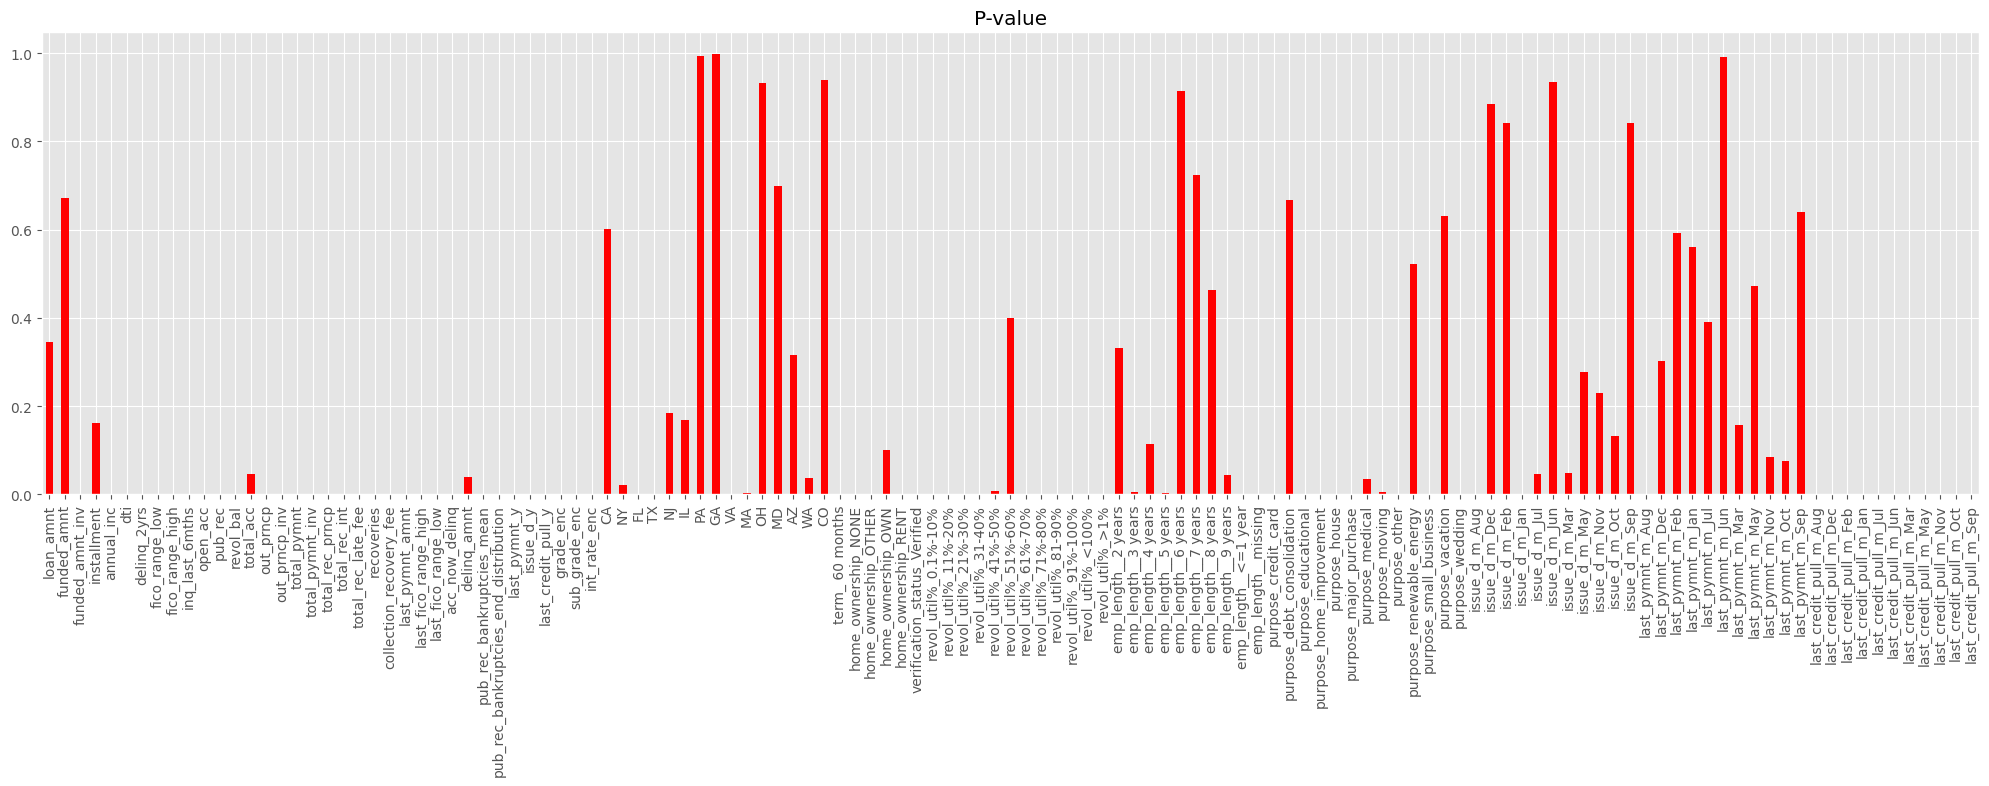

In [ ]:
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='red',figsize=(25,6))
plt.title('P-value')
plt.show()

In [ ]:
imp_features = ['loan_amnt',
 'funded_amnt_inv',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'acc_now_delinq',
 'delinq_amnt',
 'pub_rec_bankruptcies_mean',
 'pub_rec_bankruptcies_end_distribution',
 'last_pymnt_y',
 'issue_d_y',
 'last_credit_pull_y',
 'grade_enc',
 'sub_grade_enc',
 'int_rate_enc',
 'term_ 60 months',
 'home_ownership_NONE',
 'home_ownership_OTHER',
 'home_ownership_RENT',
 'verification_status_Verified',
 'revol_util%_0.1%-10%',
 'revol_util%_11%-20%',
 'revol_util%_21%-30%',
 'revol_util%_31-40%',
 'revol_util%_41%-50%',
 'revol_util%_51%-60%',
 'revol_util%_61%-70%',
 'revol_util%_71%-80%',
 'revol_util%_81-90%',
 'revol_util%_91%-100%',
 'revol_util%_<100%',
 'revol_util%_>1%',
 'emp_length__2 years',
 'emp_length__3 years',
 'emp_length__4 years',
 'emp_length__5 years',
 'emp_length__<=1 year',
 'emp_length__missing',
 'purpose_credit_card',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_other',
 'purpose_small_business',
 'purpose_wedding',
 'last_credit_pull_m_Aug',
 'last_credit_pull_m_Dec',
 'last_credit_pull_m_Feb',
 'last_credit_pull_m_Jan',
 'last_credit_pull_m_Jul',
 'last_credit_pull_m_Jun',
 'last_credit_pull_m_Mar',
 'last_credit_pull_m_May',
 'last_credit_pull_m_Nov',
 'last_credit_pull_m_Oct',
 'last_credit_pull_m_Sep']


In [ ]:
X_train_oversampled=X_train_oversampled[imp_features]

In [ ]:
X_test = X_test[imp_features]

## 8.1 Correlation

<Axes: >

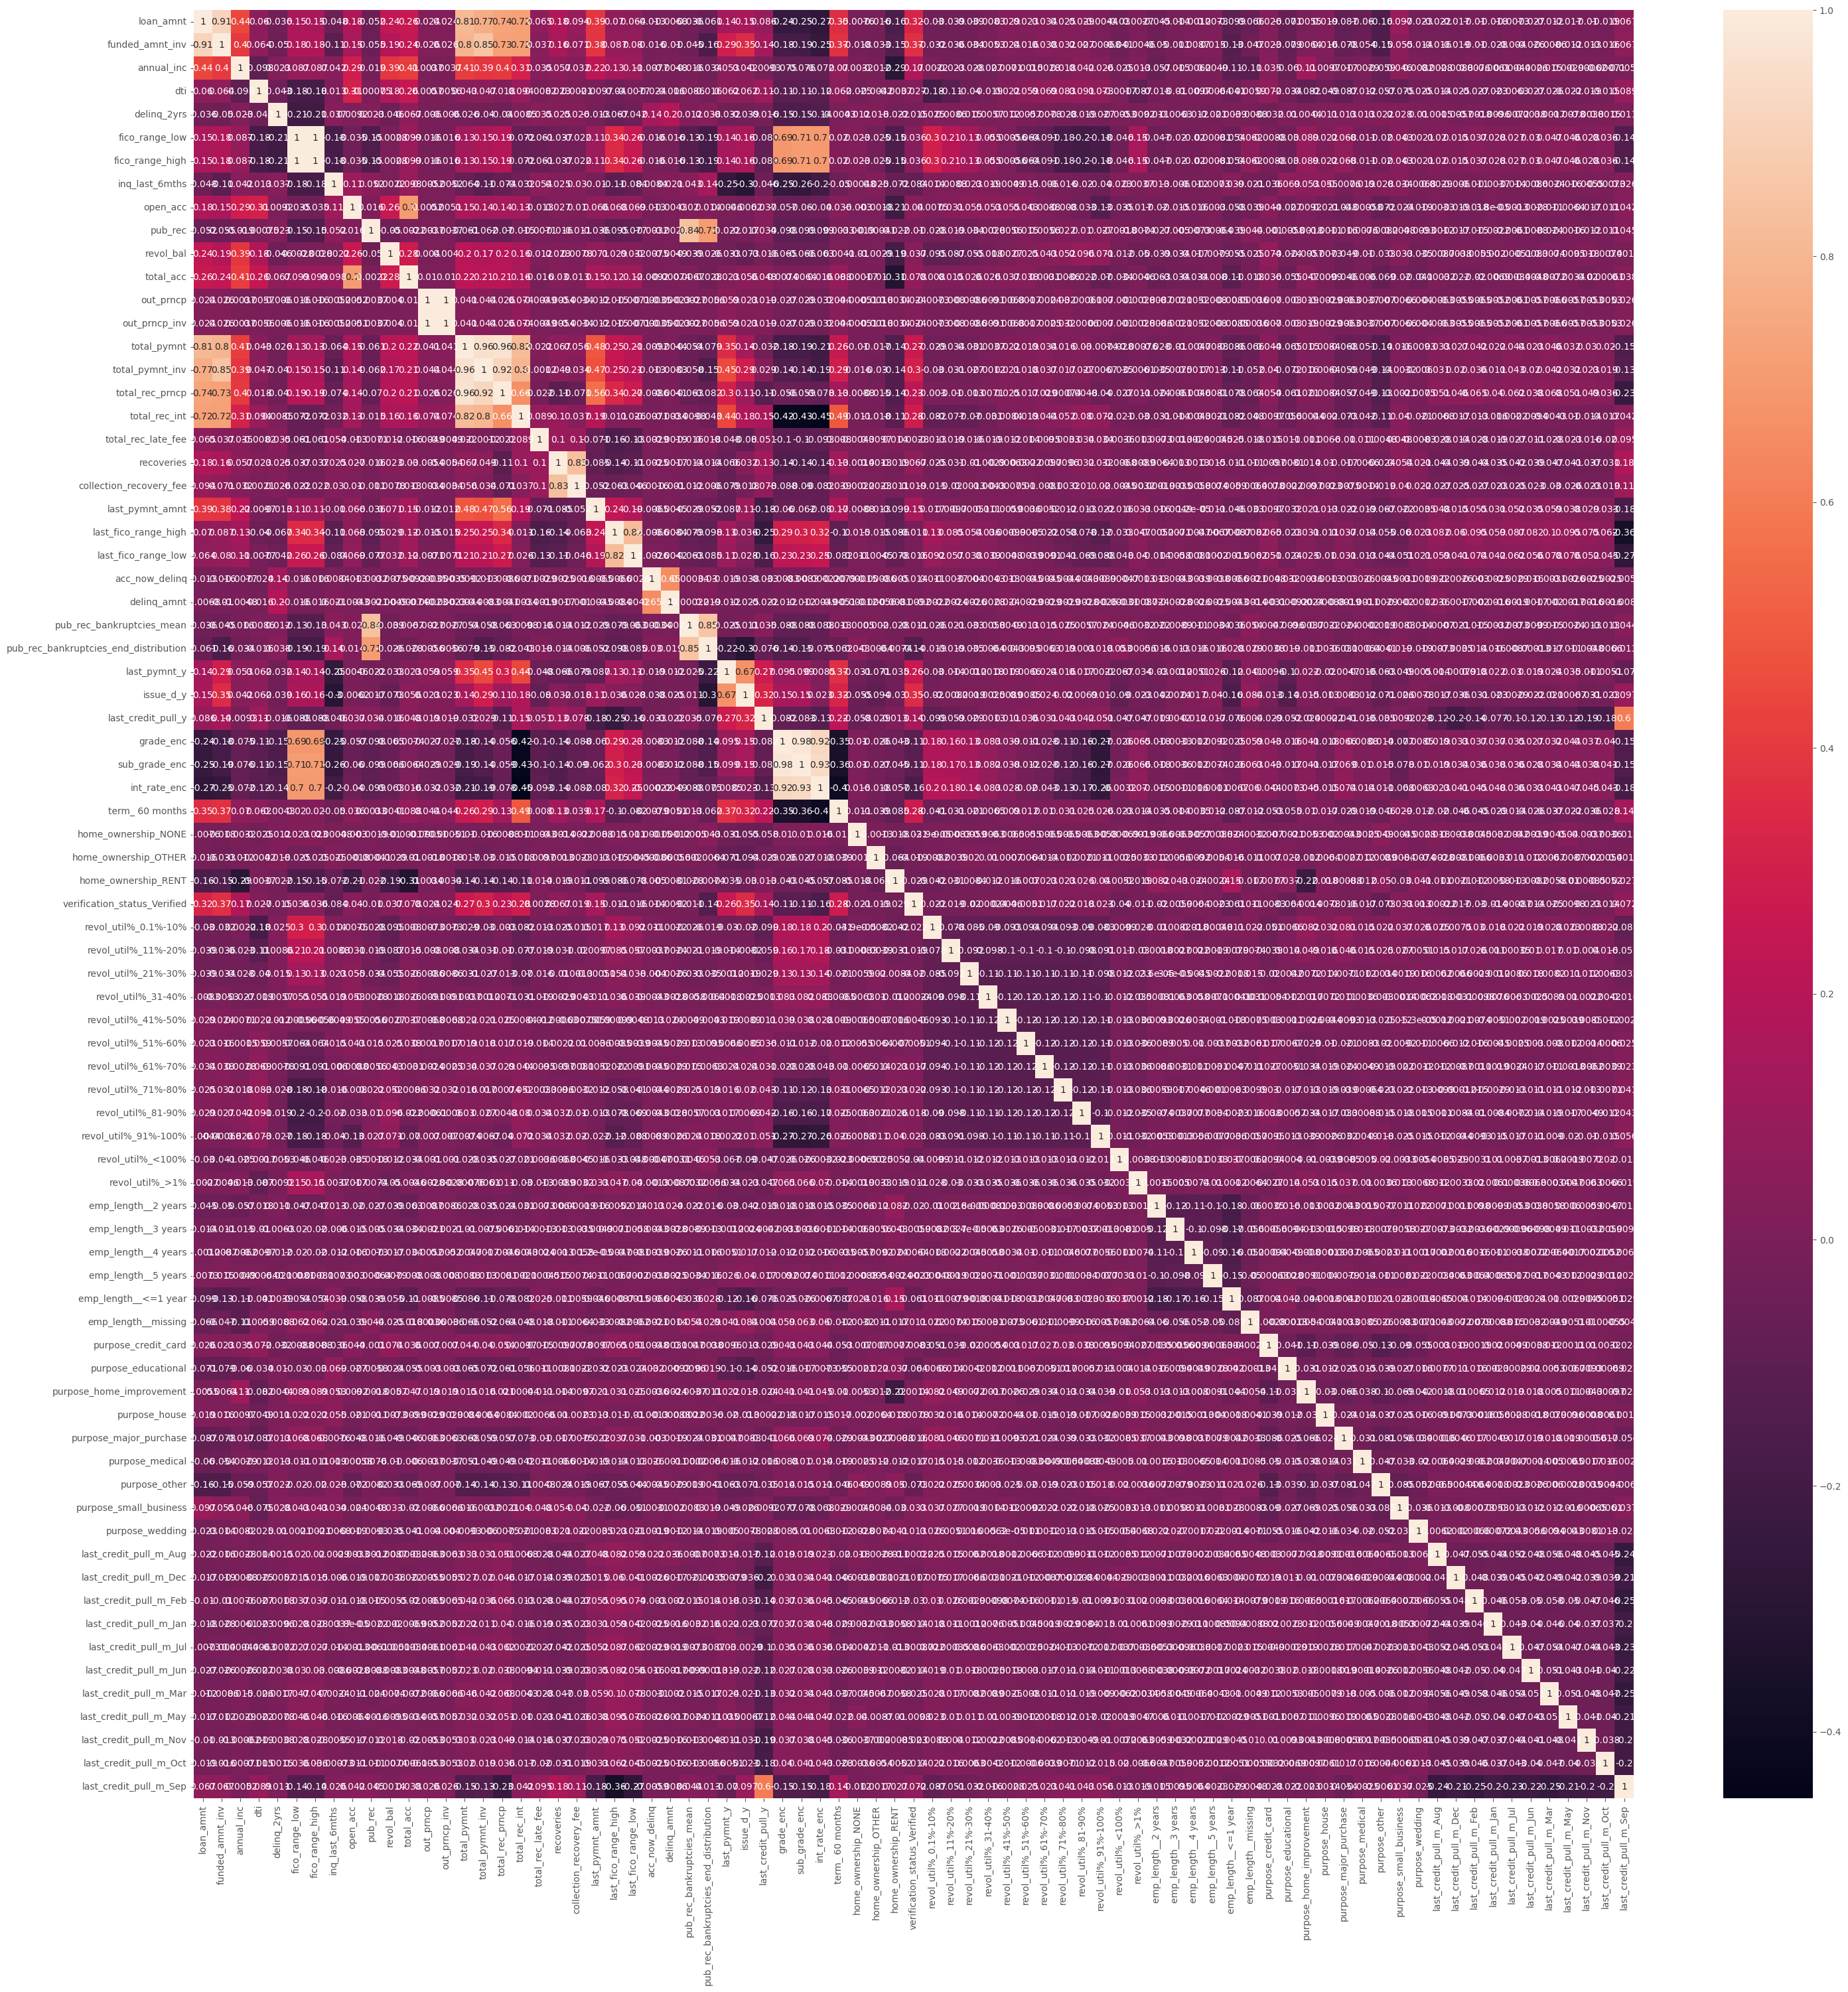

In [ ]:
corr = X_train_oversampled.corr()
top_feat = corr.index
plt.figure(figsize= (35,35))
sns.heatmap(X_train_oversampled[top_feat].corr(),annot = True)

### Remove all features with throshold > 0.7

### 8.4 Selecting Important Features

In [ ]:
X_train_oversampled = X_train_oversampled.drop(['loan_amnt','fico_range_low','total_pymnt','pub_rec_bankruptcies_mean','sub_grade_enc','int_rate_enc','last_fico_range_low','out_prncp_inv','total_pymnt_inv',
       'total_rec_prncp','collection_recovery_fee'],axis = 1)

In [ ]:
X_test = X_test.drop(['loan_amnt','fico_range_low','total_pymnt','pub_rec_bankruptcies_mean','sub_grade_enc','int_rate_enc','last_fico_range_low','out_prncp_inv','total_pymnt_inv',
       'total_rec_prncp','collection_recovery_fee' ],axis = 1)

In [ ]:
X_train_oversampled.shape

(42819, 66)

In [ ]:
X_test.shape

(10507, 66)

## Save the files

In [ ]:
# X_train_oversampled.to_csv('X_train_oversampled.csv',index = 'False')
# y_train_oversampled.to_csv('y_train_oversampled.csv',index = 'False')
# X_test.to_csv('X_test.csv',index = 'False')
# y_test.to_csv('y_test.csv',index = 'False')